Epoch: 100; Error: 31.796591823686207;
Epoch: 200; Error: 31.79668396091448;
The maximum number of train epochs is reached


C:\Users\vlads\AppData\Local\Temp\ipykernel_153532\485133218.py:21: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  pl.subplot(211)


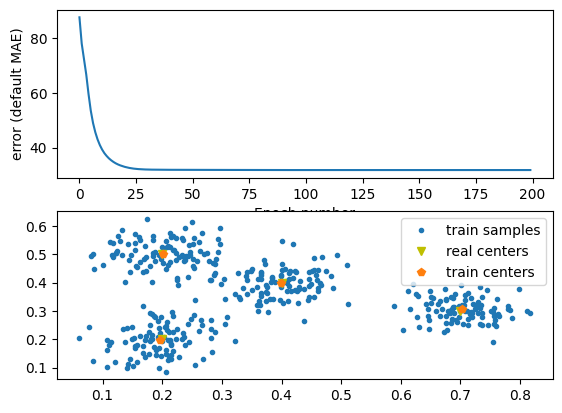

In [1]:
import numpy as np
import neurolab as nl
import numpy.random as rand

skv = 0.05
centr = np.array([[0.2, 0.2], [0.4, 0.4], [0.7, 0.3], [0.2, 0.5]])
rand_norm = skv * rand.randn(100, 4, 2)
inp = np.array([centr + r for r in rand_norm])
inp.shape = (100 * 4, 2)
rand.shuffle(inp)

# Create net with 2 inputs and 4 neurons
net = nl.net.newc([[0.0, 1.0], [0.0, 1.0]], 4)
# train with rule: Conscience Winner Take All algoritm (CWTA)
error = net.train(inp, epochs=200, show=100)

# Plot results:
import pylab as pl

pl.title("Classification Problem")
pl.subplot(211)
pl.plot(error)
pl.xlabel("Epoch number")
pl.ylabel("error (default MAE)")
w = net.layers[0].np["w"]

pl.subplot(212)
pl.plot(
    inp[:, 0], inp[:, 1], ".", centr[:, 0], centr[:, 1], "yv", w[:, 0], w[:, 1], "p"
)
pl.legend(["train samples", "real centers", "train centers"])
pl.show()